In [1379]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
# plt.style.available

In [1380]:
# importing datasets 
team_stats = pd.read_csv('D:\\vs_code_workspace\\DS 5010\\team_stats_v2.csv')
player_stats = pd.read_csv('D:\\vs_code_workspace\\DS 5010\\player_stats_v2.csv')
player_salary = pd.read_csv('D:\\vs_code_workspace\\DS 5010\\player_salaries.csv')

# BREIF LOOK OVER EACH DATASET

In [1381]:
team_stats.head(5)

,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,"APR 09, 2019 - BOS @ WAS",W,240,116,45,99,45.5,15,44,34.1,...,23,47.8,13,37,50,27,10,3,5,17
1,"APR 07, 2019 - BOS vs. ORL",L,240,108,42,89,47.2,12,31,38.7,...,14,85.7,6,33,39,28,9,4,13,19
2,"APR 05, 2019 - BOS @ IND",W,240,117,48,92,52.2,7,27,25.9,...,16,87.5,7,42,49,27,7,6,11,15
3,"APR 03, 2019 - BOS @ MIA",W,240,112,38,80,47.5,9,24,37.5,...,31,87.1,6,36,42,25,8,7,11,21
4,"APR 01, 2019 - BOS vs. MIA",W,240,110,36,91,39.6,17,40,42.5,...,24,87.5,14,35,49,25,8,2,12,18


In [1382]:
team_stats.shape

(82, 21)

In [1383]:
player_stats.head(5)

,Player,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,DREB,REB,AST,TOV,STL,BLK,PF,PTS,+/-,MATCHUP
0,Semi Ojeleye F,38:13,7,17,41.2,2.0,7.0,28.6,1.0,4.0,...,2.0,4.0,3.0,0.0,1.0,0.0,1.0,17.0,9.0,"APR 09, 2019 - BOS @ WAS"
1,Semi Ojeleye F,38:13,7,17,41.2,2.0,7.0,28.6,1.0,4.0,...,2.0,4.0,3.0,0.0,1.0,0.0,1.0,17.0,9.0,"APR 09, 2019 - BOS @ WAS"
2,Guerschon Yabusele F,25:17,5,10,50.0,3.0,5.0,60.0,0.0,2.0,...,4.0,5.0,1.0,0.0,0.0,0.0,1.0,13.0,-23.0,"APR 09, 2019 - BOS @ WAS"
3,Robert Williams III C,29:07,1,3,33.3,0.0,0.0,0.0,0.0,0.0,...,8.0,11.0,1.0,1.0,1.0,3.0,6.0,2.0,17.0,"APR 09, 2019 - BOS @ WAS"
4,Jaylen Brown G,18:03,6,13,46.2,1.0,4.0,25.0,2.0,4.0,...,2.0,3.0,2.0,3.0,3.0,0.0,1.0,15.0,-14.0,"APR 09, 2019 - BOS @ WAS"


In [1384]:
player_stats.shape

(1120, 22)

In [1385]:
player_salary.head()

,column-1,column-1 2,column-1 3
0,Gordon Hayward,31214295.0,20.70
1,Al Horford,28928709.0,20.21
2,Kyrie Irving,20099189.0,24.37
3,Marcus Smart,11660716.0,15.62
4,Jayson Tatum,6700800.0,15.13


In [1386]:
player_salary.shape

(17, 3)

# ANALYZING AND CLEANING DATASETS

In [1387]:
#finding if any NA/NULL values exist
player_stats.isnull().values.any()

True

In [1388]:
#droppping all rows which contain NA values, how= 'any'; if any values in the row are NA
player_stats = player_stats.dropna(how='any',axis=0)

In [1389]:
#dropping duplicate entries
player_stats.drop_duplicates(inplace = True)

In [1390]:
player_stats.shape

(885, 22)

#number of duplicate and NA entries
1120-885

In [1391]:
# resetting index after deleting dublicates and NA values
player_stats.reset_index(inplace= True)

del player_stats['index']

,Player,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,DREB,REB,AST,TOV,STL,BLK,PF,PTS,+/-,MATCHUP
0,Semi Ojeleye F,38:13,7,17,41.2,2.0,7.0,28.6,1.0,4.0,...,2.0,4.0,3.0,0.0,1.0,0.0,1.0,17.0,9.0,"APR 09, 2019 - BOS @ WAS"
1,Guerschon Yabusele F,25:17,5,10,50.0,3.0,5.0,60.0,0.0,2.0,...,4.0,5.0,1.0,0.0,0.0,0.0,1.0,13.0,-23.0,"APR 09, 2019 - BOS @ WAS"
2,Robert Williams III C,29:07,1,3,33.3,0.0,0.0,0.0,0.0,0.0,...,8.0,11.0,1.0,1.0,1.0,3.0,6.0,2.0,17.0,"APR 09, 2019 - BOS @ WAS"
3,Jaylen Brown G,18:03,6,13,46.2,1.0,4.0,25.0,2.0,4.0,...,2.0,3.0,2.0,3.0,3.0,0.0,1.0,15.0,-14.0,"APR 09, 2019 - BOS @ WAS"
4,Terry Rozier G,24:27,8,15,53.3,4.0,8.0,50.0,1.0,2.0,...,4.0,4.0,4.0,0.0,1.0,0.0,0.0,21.0,-16.0,"APR 09, 2019 - BOS @ WAS"


In [1392]:
# analyzing datatypes of all columns in player_stats
player_stats.dtypes

Player      object
MIN         object
FGM         object
FGA         object
FG%        float64
3PM        float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
TOV        float64
STL        float64
BLK        float64
PF         float64
PTS        float64
+/-        float64
MATCHUP     object
dtype: object

In [1393]:
# converting all object types (except player name) to int or float as working with numbers is more easy
# converting string of MM:SS format to seconds
player_stats['MIN'] = player_stats['MIN'].str.split(':').apply(lambda x: (float(x[0])*60 + float(x[1]))/60)
player_stats['FGM'] = player_stats['FGM'].astype(float)
player_stats['FGA'] = player_stats['FGA'].astype(float)

In [1394]:
# MIN not important as every match is of 240 MINS
team_stats.drop(columns='MIN', inplace= True)

# appending location to team_stats dataframe
location = list()
for i in team_stats.MATCHUP:
    if '@' in i:
        location.append('A')
    else:
        location.append('H')
        
df = pd.DataFrame(location,columns=['LOCATION'])
team_stats = pd.concat([team_stats,df], axis= 1)

,MATCHUP,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,LOCATION
0,"APR 09, 2019 - BOS @ WAS",W,116,45,99,45.5,15,44,34.1,11,...,47.8,13,37,50,27,10,3,5,17,A
1,"APR 07, 2019 - BOS vs. ORL",L,108,42,89,47.2,12,31,38.7,12,...,85.7,6,33,39,28,9,4,13,19,H
2,"APR 05, 2019 - BOS @ IND",W,117,48,92,52.2,7,27,25.9,14,...,87.5,7,42,49,27,7,6,11,15,A
3,"APR 03, 2019 - BOS @ MIA",W,112,38,80,47.5,9,24,37.5,27,...,87.1,6,36,42,25,8,7,11,21,A
4,"APR 01, 2019 - BOS vs. MIA",W,110,36,91,39.6,17,40,42.5,21,...,87.5,14,35,49,25,8,2,12,18,H


In [1395]:
# analyzing team_stats dataframe
team_stats.dtypes

MATCHUP      object
W/L          object
PTS           int64
FGM           int64
FGA           int64
FG%         float64
3PM           int64
3PA           int64
3P%         float64
FTM           int64
FTA           int64
FT%         float64
OREB          int64
DREB          int64
REB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
PF            int64
LOCATION     object
dtype: object

In [1396]:
# converting categorical data into numerical data, label encoding

LE = LabelEncoder()
team_stats['W/L'] = LE.fit_transform(team_stats['W/L'])
team_stats['LOCATION'] = LE.fit_transform(team_stats['LOCATION'])

team_stats.head()

,MATCHUP,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,LOCATION
0,"APR 09, 2019 - BOS @ WAS",1,116,45,99,45.5,15,44,34.1,11,...,47.8,13,37,50,27,10,3,5,17,0
1,"APR 07, 2019 - BOS vs. ORL",0,108,42,89,47.2,12,31,38.7,12,...,85.7,6,33,39,28,9,4,13,19,1
2,"APR 05, 2019 - BOS @ IND",1,117,48,92,52.2,7,27,25.9,14,...,87.5,7,42,49,27,7,6,11,15,0
3,"APR 03, 2019 - BOS @ MIA",1,112,38,80,47.5,9,24,37.5,27,...,87.1,6,36,42,25,8,7,11,21,0
4,"APR 01, 2019 - BOS vs. MIA",1,110,36,91,39.6,17,40,42.5,21,...,87.5,14,35,49,25,8,2,12,18,1


W/L - Win/Loss 
MIN - Minutes Played 
PTS - Points 
FGM - Field Goals Made 
FGA - Field Goals Attempted 
FG% - Field Goal Percentage 
3PM - 3 Point Field Goals Made 
3PA - 3 Point Field Goals Attempted 
3P% - 3 Point Field Goals Percentage 
FTM - Free Throws Made 
FTA - Free Throws Attempted 
FT% - Free Throw Percentage 
OREB - Offensive Rebounds 
DREB - Defensive Rebounds 
REB - Rebounds 
AST - Assists 
STL - Steals 
BLK - Blocks 
TOV - Turnovers 
PF - Personal Fouls

In [1397]:
# appending W/L column to player_stats dataframe
frames = team_stats[['MATCHUP','W/L']]
player_stats = pd.merge(frames,player_stats,on= ['MATCHUP'])

In [1398]:
# cleaning player_stats dataframe
# C,F,G are positions in which these players have played. this is not important hence removing them
player_stats.groupby('Player').MIN.mean()

Player
Al Horford C             28.796328
Al Horford F             30.409259
Aron Baynes              14.694949
Aron Baynes C            19.325490
Aron Baynes F             7.366667
Brad Wanamaker            9.517130
Daniel Theis             13.335677
Daniel Theis C           27.050000
Gordon Hayward           25.170370
Gordon Hayward F         28.008333
Greg Monroe               2.408333
Guerschon Yabusele        5.637917
Guerschon Yabusele F     25.283333
Jaylen Brown             24.879932
Jaylen Brown F           27.670833
Jaylen Brown G           27.787302
Jayson Tatum F           31.029870
Jayson Tatum G           32.716667
Kyrie Irving G           33.043284
Marcus Morris Sr.        25.999242
Marcus Morris Sr. C      29.633333
Marcus Morris Sr. F      28.633333
Marcus Smart             23.203333
Marcus Smart G           28.929722
PJ Dozier                 8.475000
RJ Hunter                25.683333
Robert Williams III       8.140000
Robert Williams III C    19.325000
Semi Ojeleye 

In [1399]:
# creating a temporary list in which player names do not have 'F','C,'G characters in them
temp = list()
for i in player_stats.Player:
    if i[-1].upper()  and i[-1] == 'F' or i[-1]== 'G' or i[-1] == 'C':
        new_str = i.replace(i[-1],"")
        temp.append(new_str.strip())
#         player_stats.Player[i] = new_str.strip()
    else:
        temp.append(i.strip())
        

In [1400]:
# converiting this list to a dataframe
df = pd.DataFrame({'Player':temp})

In [1401]:
# replacing the player column with our new stripped names df
player_stats = player_stats.assign(Player=df)

In [1402]:
# verifying if it worked
player_names = player_stats['Player'].unique()

In [1403]:
# calculating mean play time of every player
len(player_stats.groupby('Player').MIN.mean())

17

In [1404]:
#appending player salary to player stats table
# but before that we need to see how does the player_salary df look like
print(player_salary)

                 column-1  column-1 2  column-1 3
0          Gordon Hayward  31214295.0       20.70
1              Al Horford  28928709.0       20.21
2            Kyrie Irving  20099189.0       24.37
3            Marcus Smart  11660716.0       15.62
4            Jayson Tatum   6700800.0       15.13
5       Marcus Morris Sr.   5375000.0       14.28
6             Aron Baynes   5193600.0       14.06
7            Jaylen Brown   5169960.0       13.58
8            Terry Rozier   3050390.0       12.95
9      Guerschon Yabusele   2667600.0       12.26
10    Robert Williams III   1654440.0       11.15
11           Daniel Theis   1378242.0       10.62
12           Semi Ojeleye   1378242.0        8.35
13         Brad Wanamaker    838464.0        7.44
14            Greg Monroe     85458.0        7.12
15  P.J. Dozier (two-way)         NaN         NaN
16  R.J. Hunter (two-way)         NaN         NaN


In [1405]:
# renaming the columns
player_salary.rename(columns = {'column-1': 'Player',
                                'column-1 2': 'Salary',
                               'column-1 3': 'PEfR'}, inplace=True)

In [1406]:
# we can see that last two players do not have data
# computing how many matches they have played
print(player_stats[player_stats['Player'] == 'RJ Hunter'].MATCHUP.count())
print(player_stats[player_stats['Player'] == 'PJ Dozier'].MATCHUP.count())
# we can see that they did not play a significant amount of matches
# hence dropping these players will not greatly affect our dataset
# len(player_stats.groupby('Player').MIN.mean())

1
6


In [1407]:
# dropping 'RJ HUNTER' and 'PJ Dozier' from player_stats and player_salary
player_stats = player_stats[player_stats['Player'] != 'RJ Hunter']
player_stats = player_stats[player_stats['Player'] != 'PJ Dozier']
player_salary.dropna(how='any',inplace = True)
# len(player_stats.groupby('Player').MIN.mean())

In [1408]:
matches_played = player_stats.groupby('Player').MATCHUP.count().reset_index()
# matches_played = pd.DataFrame({'Player' : matches_played.index,
#                                 'Matches' : matches_played.values})
temp = list()

for i,matches_played in zip(matches_played.Player ,matches_played.MATCHUP):
    for k,annual_salary in zip(player_salary.Player ,player_salary.Salary):
        if i.lower().strip() == k.lower().strip():
#             print (i , k)
            
             temp.append([i,annual_salary/matches_played])

df = pd.DataFrame(temp,columns=['Player','SALARY_PER_GAME'])
player_stats = pd.merge(df,player_stats,on = ['Player'])

In [1409]:
player_stats = pd.merge(player_salary[['Player','PEfR']],player_stats, on = ['Player'])
player_stats.head()

,Player,PEfR,SALARY_PER_GAME,MATCHUP,W/L,MIN,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,PTS,+/-
0,Gordon Hayward,20.7,433531.875,"APR 07, 2019 - BOS vs. ORL",0,37.983333,8.0,14.0,57.1,0.0,...,0.0,5.0,5.0,4.0,1.0,1.0,0.0,1.0,16.0,-5.0
1,Gordon Hayward,20.7,433531.875,"APR 05, 2019 - BOS @ IND",1,25.550000,9.0,9.0,100.0,0.0,...,0.0,4.0,4.0,2.0,1.0,1.0,0.0,0.0,21.0,23.0
2,Gordon Hayward,20.7,433531.875,"APR 03, 2019 - BOS @ MIA",1,32.200000,5.0,10.0,50.0,3.0,...,0.0,8.0,8.0,5.0,0.0,0.0,1.0,3.0,25.0,16.0
3,Gordon Hayward,20.7,433531.875,"APR 01, 2019 - BOS vs. MIA",1,28.983333,4.0,7.0,57.1,1.0,...,1.0,3.0,4.0,1.0,2.0,2.0,1.0,3.0,11.0,-10.0
4,Gordon Hayward,20.7,433531.875,"MAR 30, 2019 - BOS @ BKN",0,28.783333,7.0,12.0,58.3,1.0,...,0.0,6.0,6.0,3.0,2.0,1.0,0.0,2.0,19.0,-8.0


# DATA READY FOR VISUALIZATION

W/L - Win/Loss MIN - Minutes Played PTS - Points FGM - Field Goals Made FGA - Field Goals Attempted FG% - Field Goal Percentage 3PM - 3 Point Field Goals Made 3PA - 3 Point Field Goals Attempted 3P% - 3 Point Field Goals Percentage FTM - Free Throws Made FTA - Free Throws Attempted FT% - Free Throw Percentage OREB - Offensive Rebounds DREB - Defensive Rebounds REB - Rebounds AST - Assists STL - Steals BLK - Blocks TOV - Turnovers PF - Personal Fouls

# TEAM DATA ANALYSIS

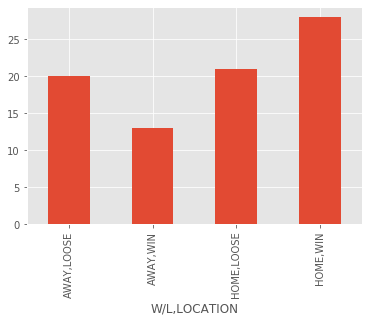

In [1575]:
%matplotlib inline
x = team_stats['LOCATION'].groupby([team_stats['W/L'],team_stats['LOCATION']]).count()
ax = x.plot(kind='bar')
ax.set_xticklabels(['AWAY,LOOSE','AWAY,WIN','HOME,LOOSE','HOME,WIN'])
ax

# ANALYZING WHAT MAKES A PLAYER VALUABLE

In [1554]:
player_stats.columns

Index(['Player', 'PEfR', 'SALARY_PER_GAME', 'MATCHUP', 'W/L', 'MIN', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', '+/-'],
      dtype='object')

C:\Users\omkar waghmare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


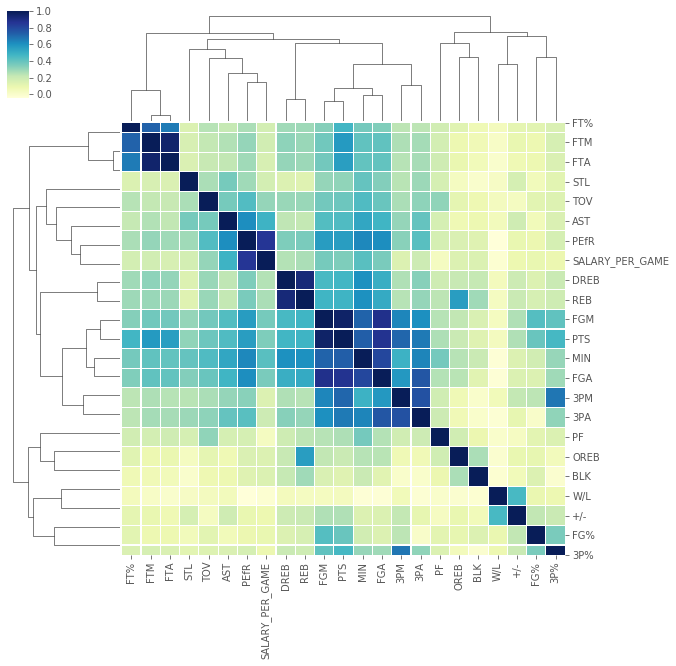

In [1795]:
cg = sns.clustermap(player_stats.corr(), cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
plt.tight_layout()

from the correlation graph above we can see that salary_per_game, FGM, MIN, PTS FGA, 3PM, PEfR have a good co-relation with each other.


# LOOKING AT OFFENCE FIRST

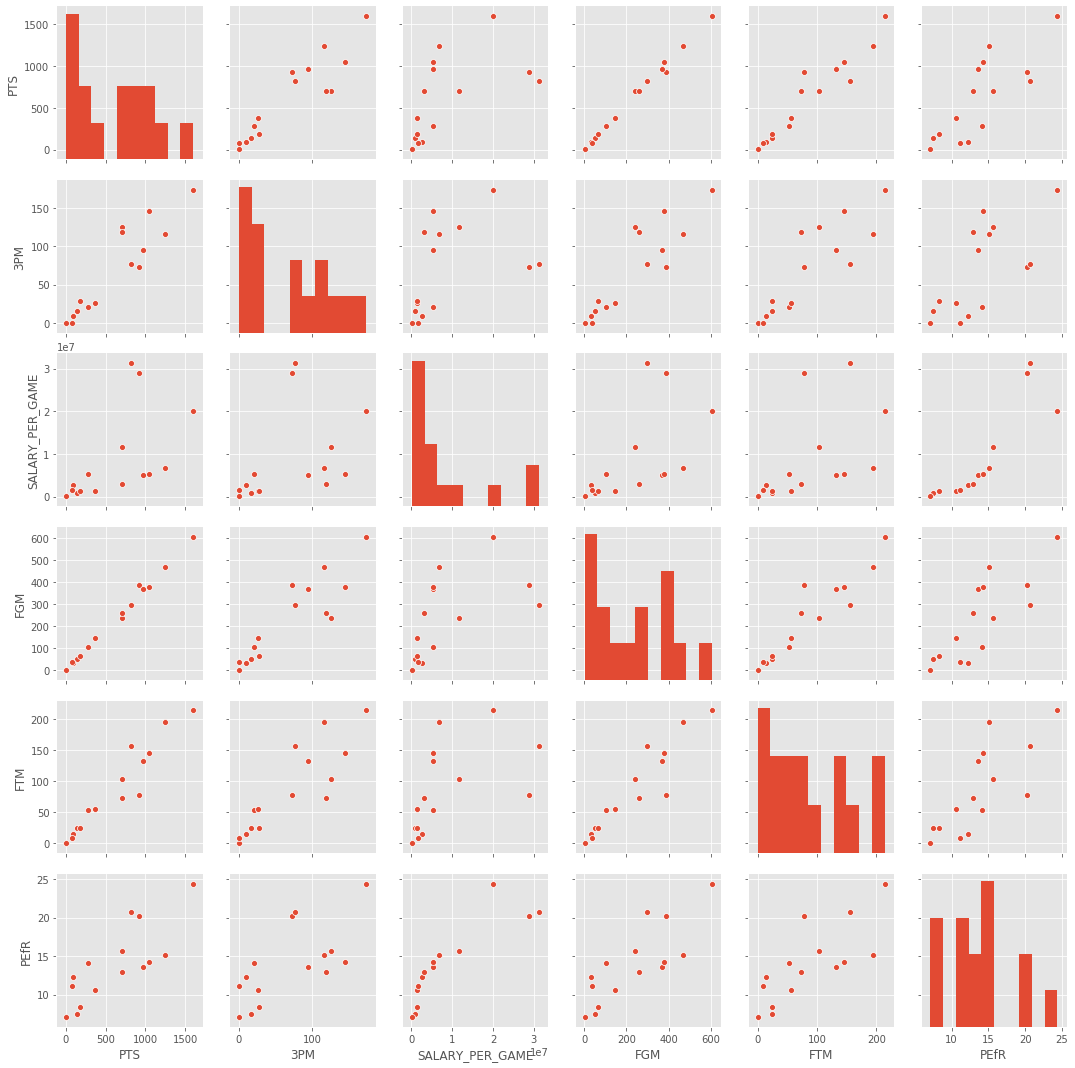

In [1924]:
offence = player_stats[['Player','PTS','3PM','SALARY_PER_GAME','FGM','FTM']].groupby('Player').sum().reset_index()
e_rate = player_stats[['Player','PEfR']].groupby('Player').mean().reset_index()
df = pd.merge(offence,e_rate,on='Player')
sns.pairplot(df)

C:\Users\omkar waghmare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


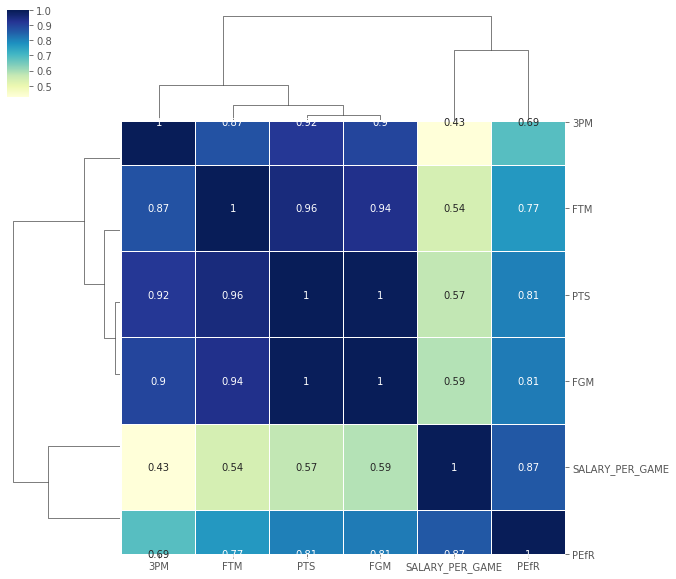

In [1930]:
cg = sns.clustermap(df.corr(), cmap ="YlGnBu", linewidths = 0.1, annot = True); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
plt.tight_layout()

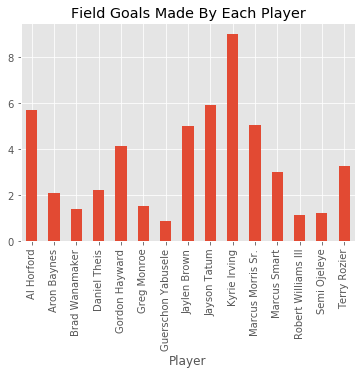

In [1802]:
# we can see that FGM and PEfR have a good co-relation
FGM_by_player = player_stats.groupby(['Player']).FGM.mean()
# plt.subplots(1,2,1)
FGM_by_player.plot(kind='bar',title='Field Goals Made By Each Player')

# plt.subplots_adjust(hspace = 1.25)


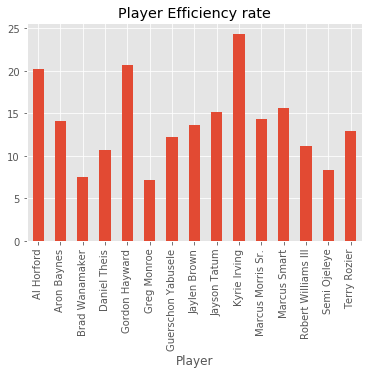

In [1535]:
player_eff_rate = player_stats.groupby('Player').PEfR.mean()
player_eff_rate.plot(kind='bar',title='Player Efficiency rate')

Text(0.5, 1.0, 'FGM vs PEfR')

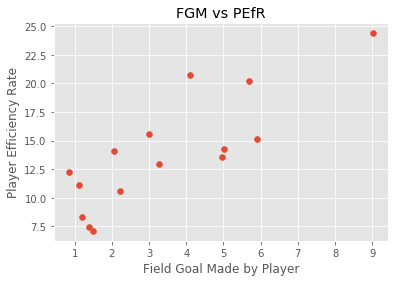

In [1539]:
plt.scatter(x=FGM_by_player,y=player_eff_rate)
plt.xlabel('Field Goal Made by Player')
plt.ylabel('Player Efficiency Rate')
plt.title('FGM vs PEfR')

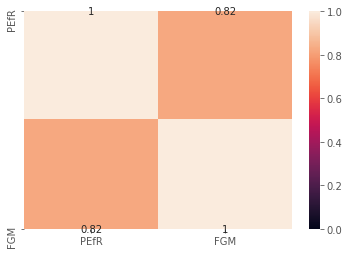

In [1725]:
FGM_by_player.reset_index()
player_eff_rate.reset_index()
df = pd.merge(player_eff_rate,FGM_by_player, on='Player')
sns.heatmap(df.corr(),vmin=0, vmax=1, annot = True)

Text(0.5, 1.0, 'SALARY_PER_GAME vs PEfR')

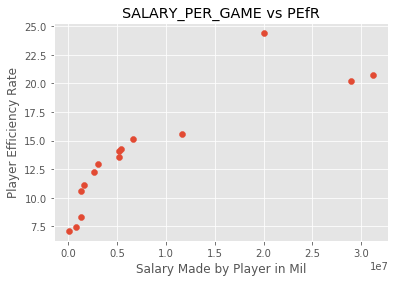

In [2045]:
salary_per_game = player_stats.groupby('Player').SALARY_PER_GAME.sum()
plt.scatter(x=salary_per_game, y = player_eff_rate)
plt.xlabel('Salary Made by Player in Mil')
plt.ylabel('Player Efficiency Rate')
plt.title('SALARY_PER_GAME vs PEfR')

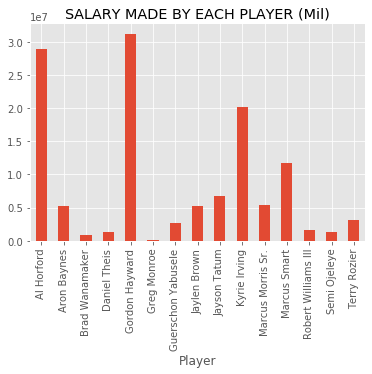

In [2046]:
salary_per_game = player_stats.groupby('Player').SALARY_PER_GAME.sum()
salary_per_game.plot(kind='bar' , title = 'SALARY MADE BY EACH PLAYER (Mil)')

Text(0.5, 1.0, 'SALARY vs 3PM')

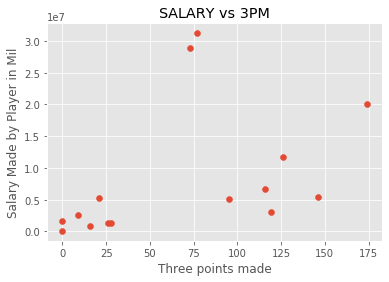

In [2047]:
three_points_made = player_stats.groupby('Player')['3PM'].sum()
plt.scatter(x = three_points_made , y = salary_per_game)
plt.ylabel('Salary Made by Player in Mil')
plt.xlabel('Three points made')
plt.title('SALARY vs 3PM')

In [ ]:
# overall linearly depeneded, but small discrepencies are found, these may be because of player repuatition and efficiency rate of that player. 

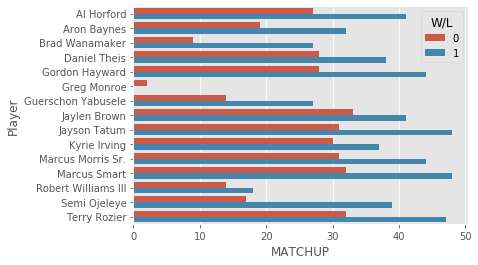

In [1729]:
# plot is fixed *******************************
var = player_stats.groupby(['Player','W/L']).MATCHUP.count().reset_index()
sns.barplot(x='MATCHUP',y='Player', hue= 'W/L', data= var)


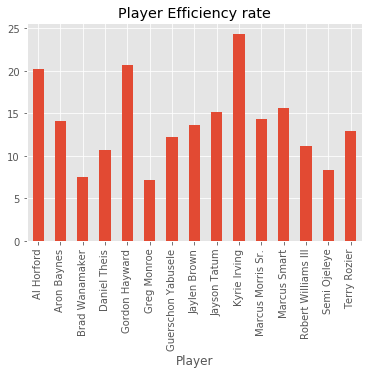

In [2022]:
player_eff_rate = player_stats.groupby('Player').PEfR.mean()
player_eff_rate.plot(kind='bar',title='Player Efficiency rate')

Text(0.5, 1.0, 'PTS vs SALARY_PER_GAME')

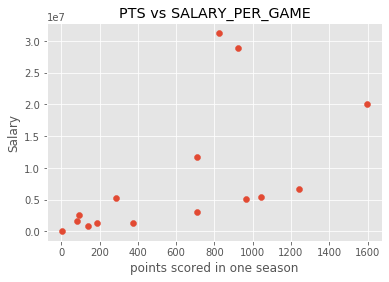

In [2049]:
points = player_stats.groupby('Player').PTS.sum()
plt.scatter(x = points , y  = salary_per_game )
plt.xlabel('points scored in one season')
plt.ylabel('Salary')
plt.title('PTS vs SALARY_PER_GAME')
# can see some variations, these may be cause by the player position 

Text(0.5, 1.0, 'PTS V/S PEfR ')

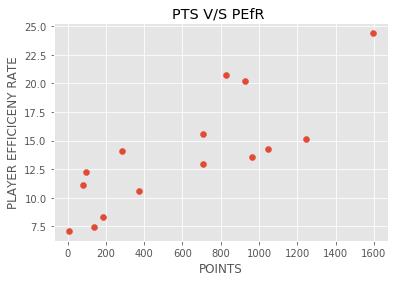

In [2261]:
plt.scatter(x = points , y = player_eff_rate)
plt.xlabel('POINTS')
plt.ylabel('PLAYER EFFICICENY RATE')
plt.title('PTS V/S PEfR ')

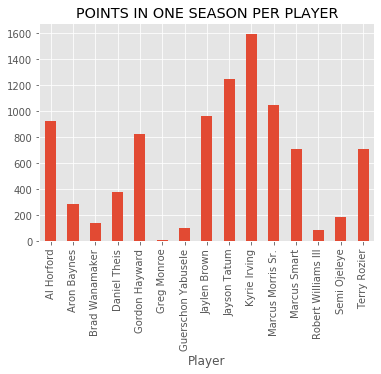

In [2050]:
points.plot(kind = 'bar', title = 'POINTS IN ONE SEASON PER PLAYER')
# interesting to note that Al Harford has high player rating, and has a high salary and has played a lot of matches but has scored avegrage points.
# this may be because he plays at the center position
# where as Kyrie Irving has played lesser matches than him, but has the highest peffr and also has the highest number of points scored
# this maybe because he playes at the forward position

Text(0.5, 1.0, 'FT vs TPM player wise')

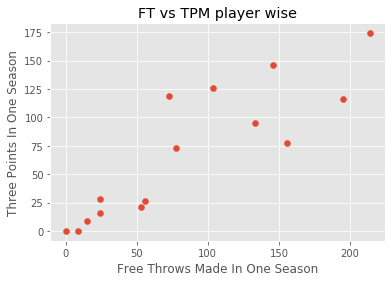

In [2051]:
# finding the relation between free throws and three pointers
free_throws = player_stats.groupby('Player').FTM.sum()
plt.scatter(x = free_throws, y = three_points_made)
plt.xlabel('Free Throws Made In One Season')
plt.ylabel('Three Points In One Season')
plt.title('FT vs TPM player wise')
# this shows that a player who is good at free throws is also good at shooting three pointers.

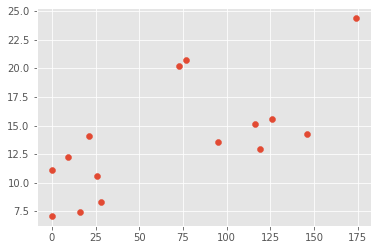

In [2264]:
# lets look if 3PT and player eff rate are related to each other
plt.scatter(x = three_points_made , y =player_eff_rate)

# LETS LOOK AT DEFENCE NOW

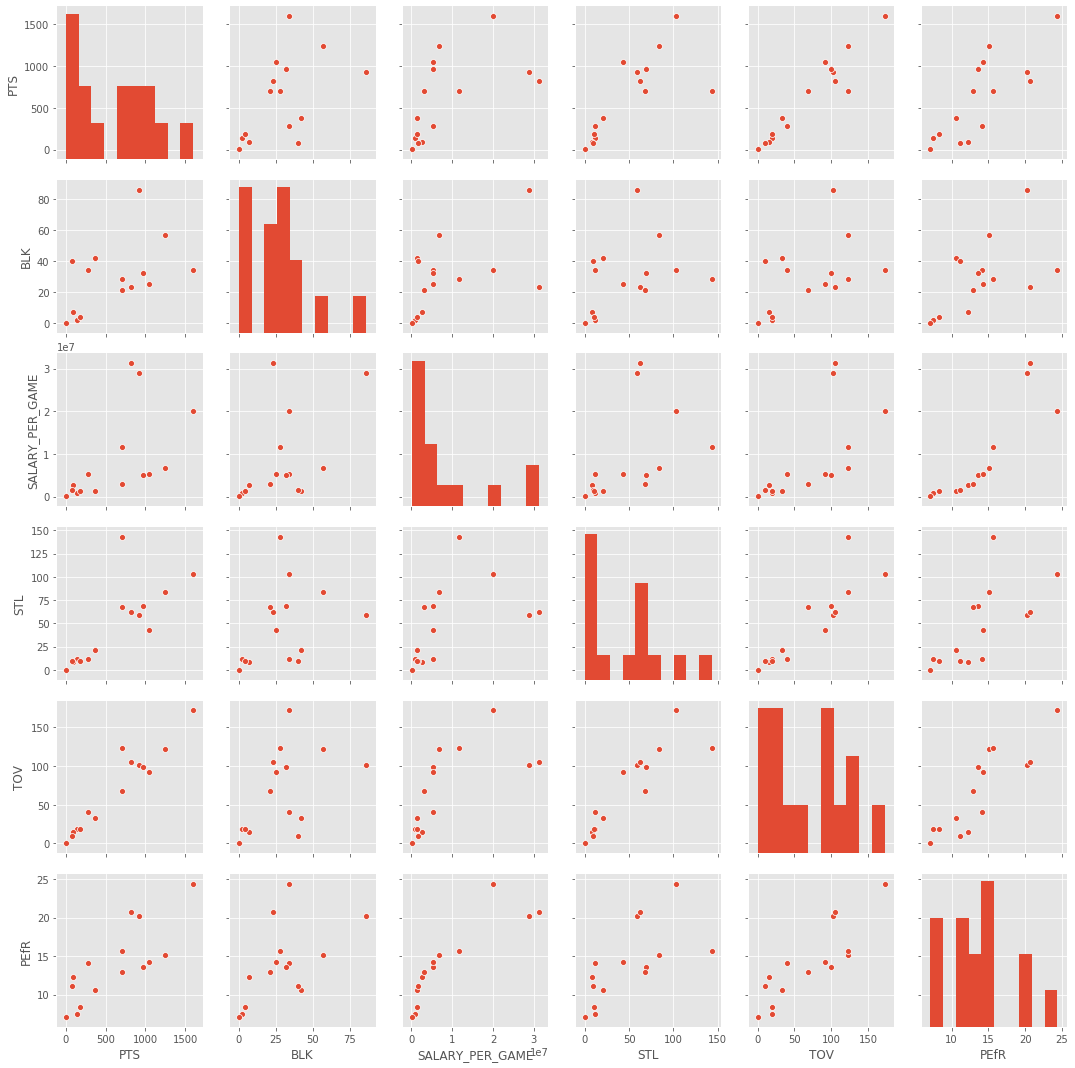

In [2031]:
defence = player_stats[['Player','PTS','BLK','SALARY_PER_GAME','STL','TOV']].groupby('Player').sum().reset_index()
e_rate = player_stats[['Player','PEfR']].groupby('Player').mean().reset_index()
df2 = pd.merge(defence,e_rate,on='Player')
sns.pairplot(df2)

C:\Users\omkar waghmare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


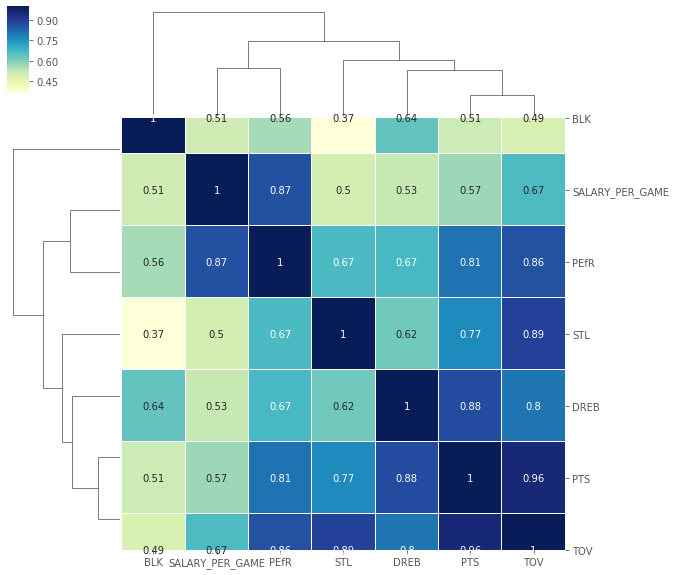

In [2030]:
cg = sns.clustermap(df2.corr(), cmap ="YlGnBu", linewidths = 0.1, annot = True); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
plt.tight_layout()

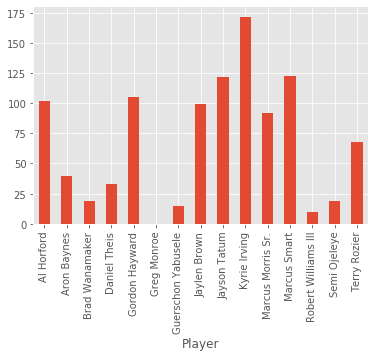

In [2272]:
turn_overs = player_stats.groupby('Player')['TOV'].sum()
turn_overs.plot(kind = 'bar')

Text(0.5, 1.0, 'TOV v/s Salary')

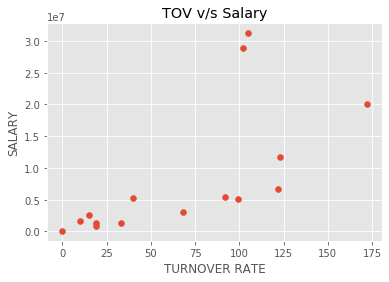

In [2275]:
# lets see how turn over rate is deoendent on salary
plt.scatter(x = turn_overs , y = salary_per_game)
plt.xlabel("TURNOVER RATE")
plt.ylabel("SALARY")
plt.title("TOV v/s Salary")

Text(0.5, 1.0, 'TOV vs STL')

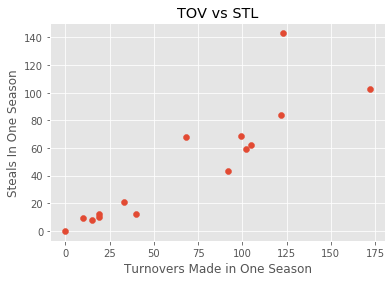

In [2052]:
# we can see that salalry_per_game , PEfR , TOV and STL have a high positive co-relation
# plotting TOV vs STL
turn_overs = player_stats.groupby('Player')['TOV'].sum().reset_index().set_index('Player')
steals = player_stats.groupby('Player')['STL'].sum().reset_index().set_index('Player')

plt.scatter(x = turn_overs , y = steals)
plt.xlabel('Turnovers Made in One Season')
plt.ylabel('Steals In One Season')
plt.title('TOV vs STL')

we can see that they are positively , linearly depenendet , this makes sense as turnover is in direct effect of steals. That is both events are dependent, a steal causes a turnover.
but a turnover is revorded only when the stealing team scores.
hence a 100% co-rrelation is not seen here.

Text(0.5, 1.0, 'TOV vs PTS')

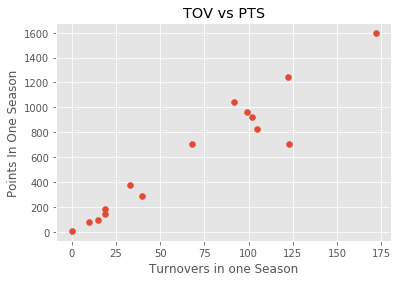

In [2053]:
# another interesting relation that we can see is PTS vs TOV, more the turn overs, more the points gained
# this makes complete sense for these two attributes to have a high positive co-relation.
plt.scatter(x = turn_overs , y = points)
plt.xlabel('Turnovers in one Season')
plt.ylabel('Points In One Season')
plt.title('TOV vs PTS')

Text(0.5, 1.0, 'TOV vs PEfR')

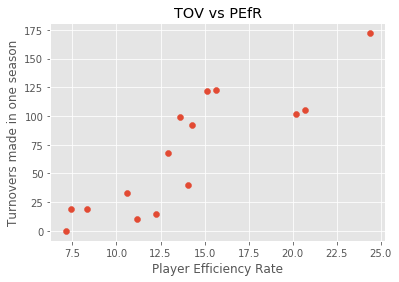

In [2055]:
# we can also see that salary per game is not that related to steals, blocks and turnovers.
# this would makes us think that defence is not that important in determining the salary of player.
# but as we can see that player efficiency rate does have a positive co-relation between the STL and TOV
# so indirectly salary of a player is also dependent of the defence
plt.scatter(x = player_eff_rate, y = turn_overs)
plt.ylabel('Turnovers made in one season')
plt.xlabel('Player Efficiency Rate')
plt.title('TOV vs PEfR')

Text(0.5, 1.0, 'STL vs PEfR')

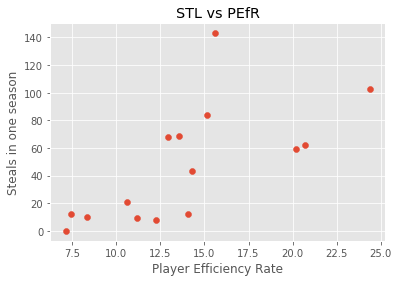

In [2056]:
plt.scatter(x = player_eff_rate, y = steals)
plt.ylabel('Steals in one season')
plt.xlabel('Player Efficiency Rate')
plt.title('STL vs PEfR')

# LOOKING AT REMAINING ATTRIBUTES NOW

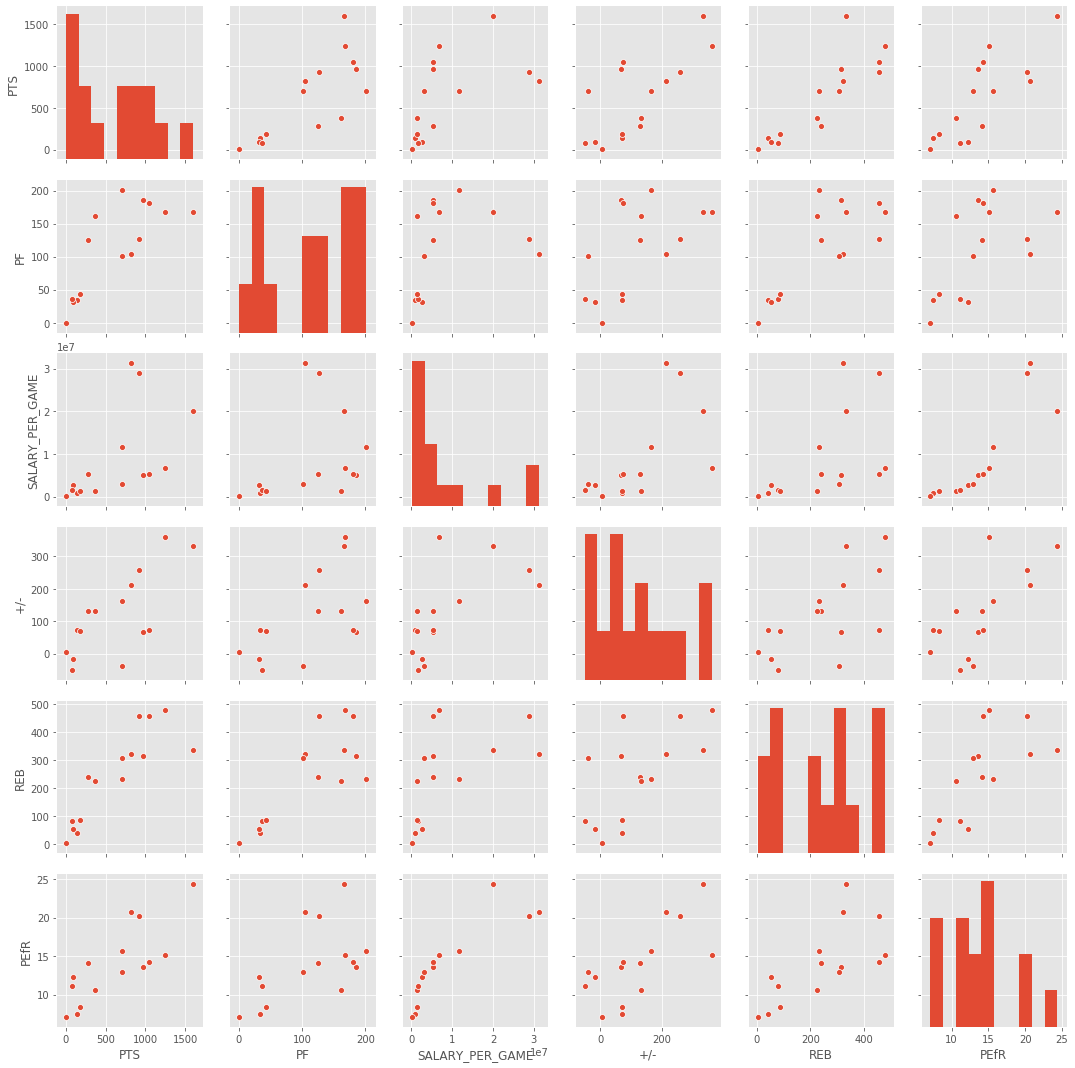

In [2042]:
rem = player_stats[['Player','PTS','PF','SALARY_PER_GAME','+/-','REB']].groupby('Player').sum().reset_index()
e_rate = player_stats[['Player','PEfR']].groupby('Player').mean().reset_index()
df3 = pd.merge(rem,e_rate,on='Player')
sns.pairplot(df3)

C:\Users\omkar waghmare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


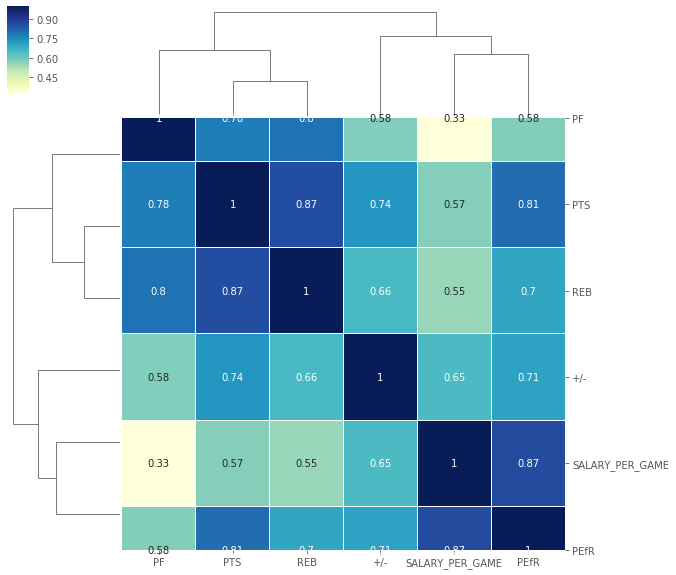

In [2043]:
cg = sns.clustermap(df3.corr(), cmap ="YlGnBu", linewidths = 0.1, annot = True); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
plt.tight_layout()

Text(0.5, 1.0, 'REB vs PF')

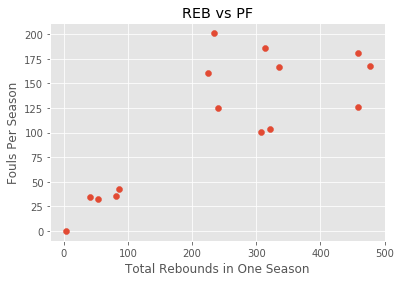

In [2073]:
# we can see that rebounds and player fouls have a good co-relation.
# this would infer that majority of fouls are created when players are rebounding, it may be offensive or defensive rebound.
reb = player_stats.groupby('Player')['REB'].sum()
player_foul = player_stats.groupby('Player')['PF'].sum()
plt.scatter(x = reb , y = player_foul)
plt.xlabel('Total Rebounds in One Season')
plt.ylabel('Fouls Per Season')
plt.title('REB vs PF')

Text(0.5, 1.0, 'REB vs PTS')

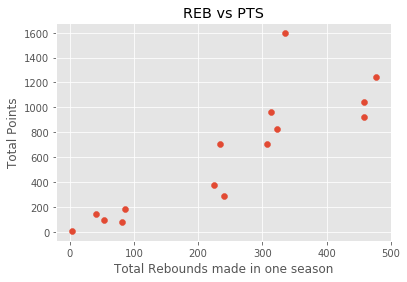

In [2058]:
# we can also see that rebounds and points have a good positive co-relation
# this makes sense as the more rebounds the player takes, more the points he scores
plt.scatter( x = reb, y = points)
plt.xlabel('Total Rebounds made in one season')
plt.ylabel('Total Points')
plt.title('REB vs PTS')

Text(0.5, 1.0, 'REB vs PEfR')

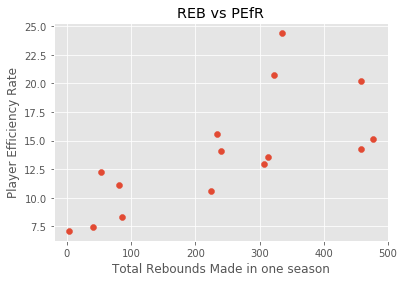

In [2059]:
#  we can also see that rebounds and PEfR have a positive co-relation
# this also makes sense as rebonds and points are co-related.
# so more the rebounds, more the points, and higher the player_efficiency_rate
plt.scatter(x = reb , y = player_eff_rate)
plt.xlabel('Total Rebounds Made in one season')
plt.ylabel('Player Efficiency Rate')
plt.title('REB vs PEfR')

In [2060]:
# conclusion :
# from the above graphs we can see that a players salary is closely dependent on the Player efficiency Rate and the Points he scores in one season
#  PEfR and PTS are further dependent on the FGM, FTM , 3PM (offence), REB ,TOV, STL (defence) 
# therefor a players salary is depenedent on FGM,FTM,PTS,PEfR,3PM,REB,TOV,STL

In [2276]:
# testing our hypothesis
train_test = player_stats[['Player','PTS','SALARY_PER_GAME']].groupby('Player').sum().reset_index()
e_rate = player_stats[['Player','PEfR']].groupby('Player').mean().reset_index()
df = pd.merge(e_rate,train_test,on='Player')
df.columns

Index(['Player', 'PEfR', 'PTS', 'SALARY_PER_GAME'], dtype='object')

In [2277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size = 0.2, random_state = 234)

In [2278]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

In [2279]:
print(predictions)

[11881510.91548323  5428277.59957612 -1905154.4092911 ]


In [2280]:
print(y_test)

11    11660716.0
14     3050390.0
13     1378242.0
Name: SALARY_PER_GAME, dtype: float64


In [2281]:
print(lr.score(x_test,y_test))

0.7292754524935753


In [2271]:
# as we can see almost 73% of time the predictions will be right